<a href="https://colab.research.google.com/github/vivekvardhan30/AIML-LAB/blob/main/Lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**6_decision _trees_for_classification**

import libraries and load data


In [17]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load the data

In [18]:
from sklearn.datasets import fetch_openml
car_data=fetch_openml(name='car',version=2,parser='auto')

In [19]:
type(car_data)

sklearn.utils._bunch.Bunch

In [20]:
car_data.details

{'id': '991',
 'name': 'car',
 'version': '2',
 'description_version': '1',
 'format': 'ARFF',
 'upload_date': '2014-10-04T22:44:31',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/53525/car.arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'file_id': '53525',
 'default_target_attribute': 'binaryClass',
 'tag': ['Chemistry',
  'derived',
  'Life Science',
  'mythbusting_1',
  'study_1',
  'study_15',
  'study_20',
  'study_41',
  'study_7'],
 'visibility': 'public',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:17:54',
 'md5_checksum': '49c57b793eef1b8e55f297e5e019fdbf'}

In [21]:
car_data.details['version']

'2'

In [22]:
print(car_data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.


In [23]:
#Displaying features names
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [24]:
#Getting the whole dataframe
car_data=car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [25]:
type(car_data)


pandas.core.frame.DataFrame

Splitting Data into Training and Test sets

In [27]:
from sklearn.model_selection import train_test_split
train_data ,test_data=train_test_split(car_data,test_size=0.3,random_state=20)
print('The size of training data is:{} \n The size of testing data is:{}'.format(len(train_data),len(test_data)))

The size of training data is:1209 
 The size of testing data is:519


Checking Summary Statistics

In [28]:
train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1209,1209,1209,1209,1209,1209,1209
unique,4,4,4,3,3,3,2
top,med,high,5more,more,big,med,P
freq,327,311,319,418,411,406,849


Check Missing Values

In [29]:
train_data.isnull().sum()

buying         0
maint          0
doors          0
persons        0
lug_boot       0
safety         0
binaryClass    0
dtype: int64

**Checking Categoricak Features**

Let's inspect some categorical features that are in the dataset, almost all. Let's see that!

In [30]:
train_data['buying'].value_counts()

med      327
high     307
vhigh    291
low      284
Name: buying, dtype: int64

In [32]:
train_data['maint'].value_counts()

high     311
med      311
vhigh    294
low      293
Name: maint, dtype: int64

In [33]:
train_data['doors'].value_counts()

5more    319
2        312
4        296
3        282
Name: doors, dtype: int64

In [34]:
train_data['persons'].value_counts()

more    418
2       407
4       384
Name: persons, dtype: int64

<Axes: xlabel='buying', ylabel='count'>

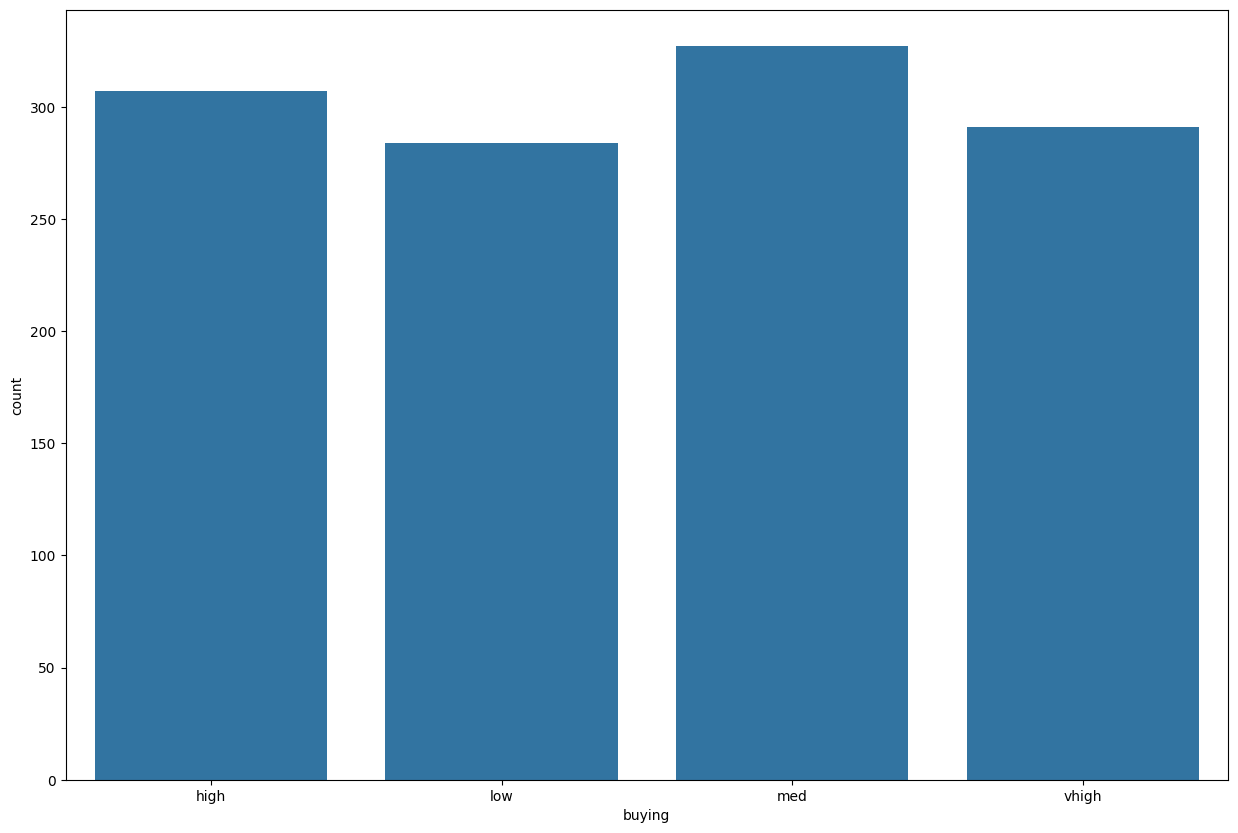

In [31]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='buying')

<Axes: xlabel='buying', ylabel='count'>

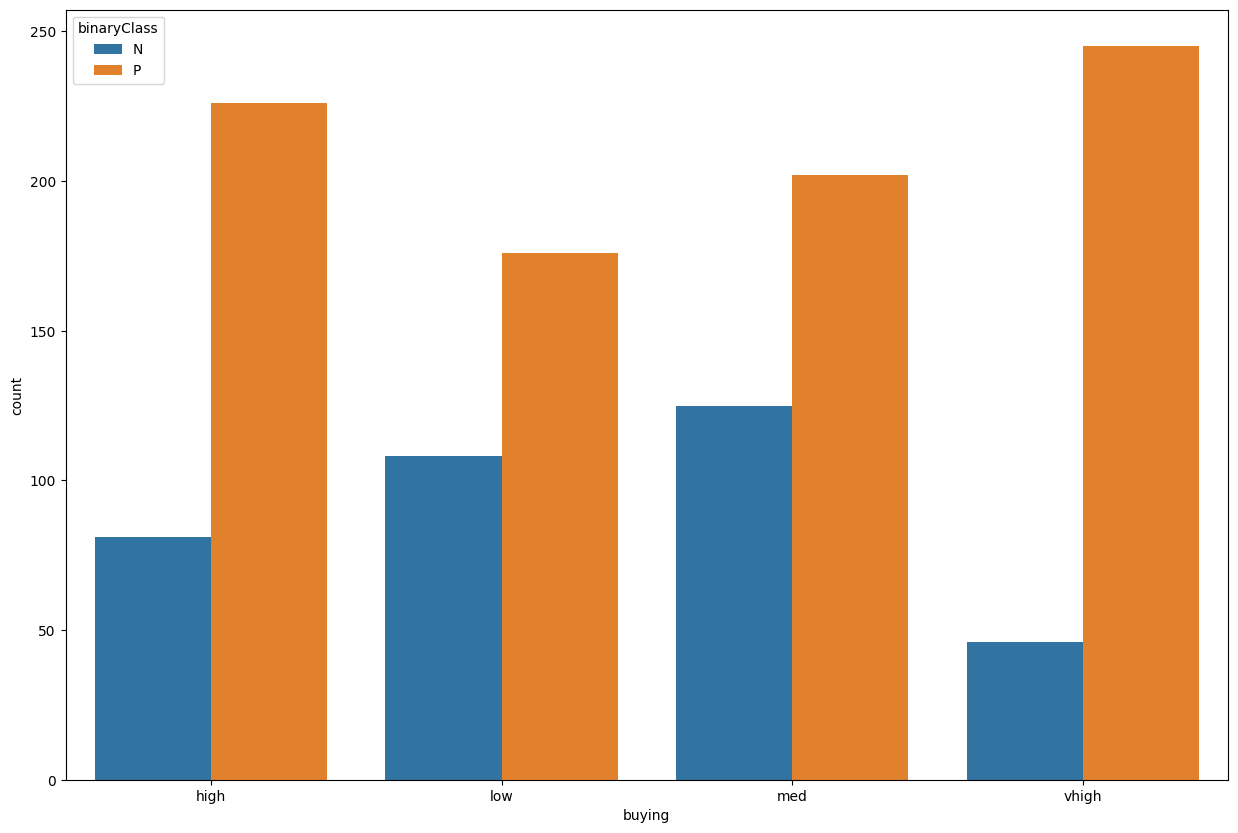

In [35]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying', hue='binaryClass')

As you can see above ,the majority

<Axes: xlabel='maint', ylabel='count'>

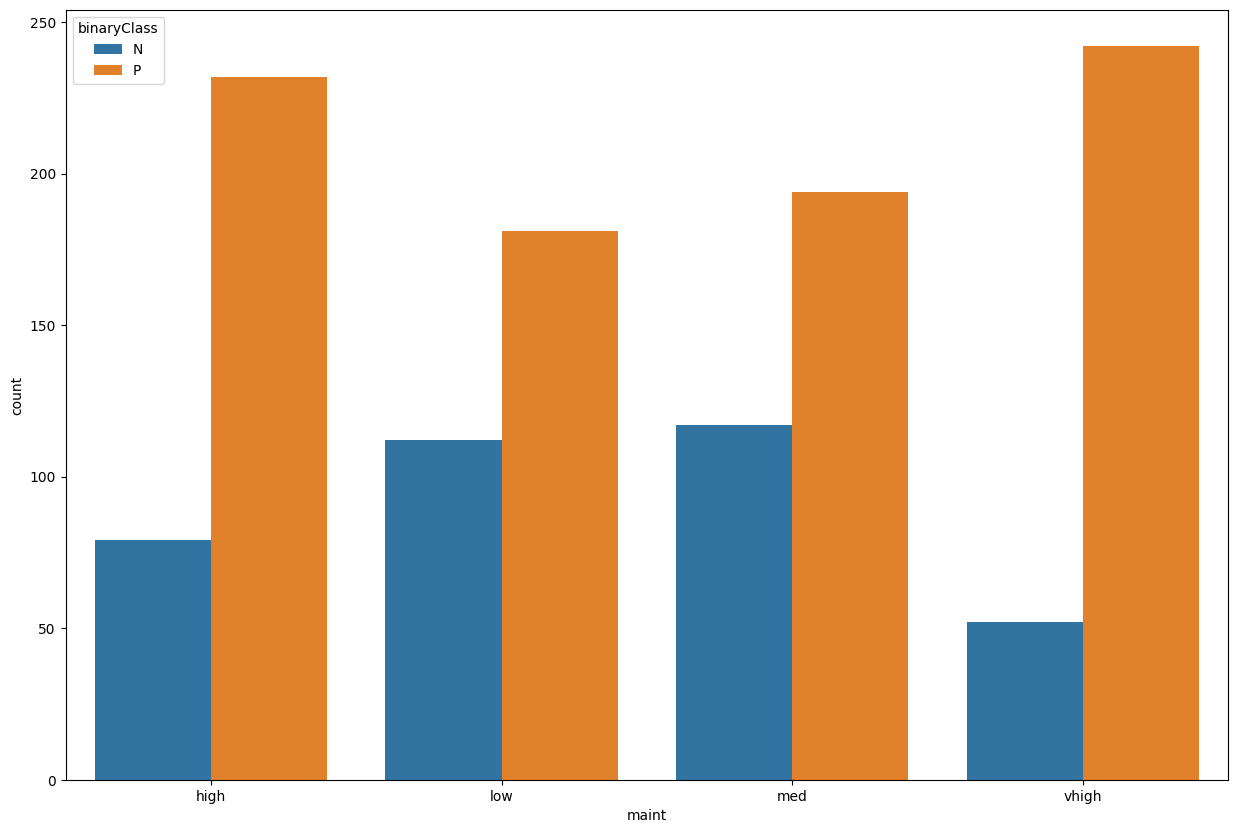

In [36]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='maint', hue='binaryClass')

<Axes: xlabel='doors', ylabel='count'>

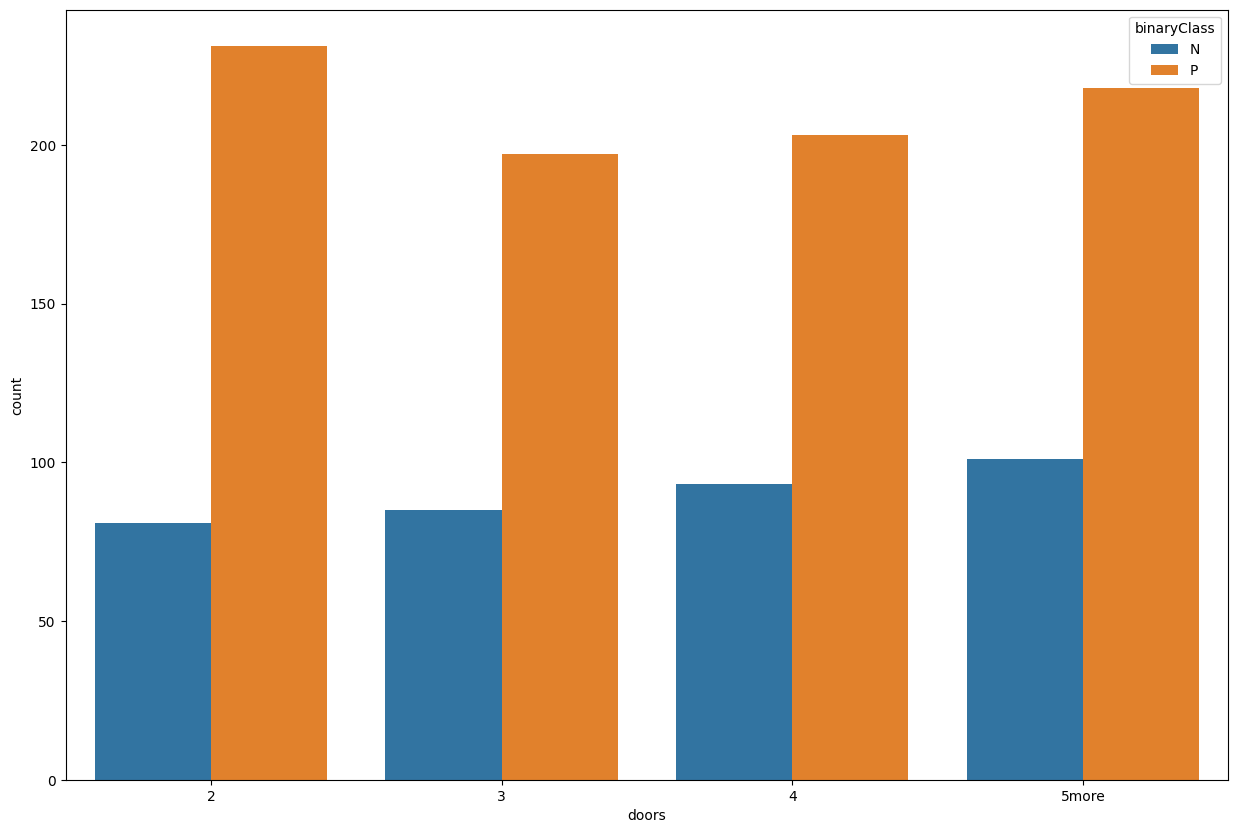

In [37]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='doors', hue='binaryClass')

<Axes: xlabel='persons', ylabel='count'>

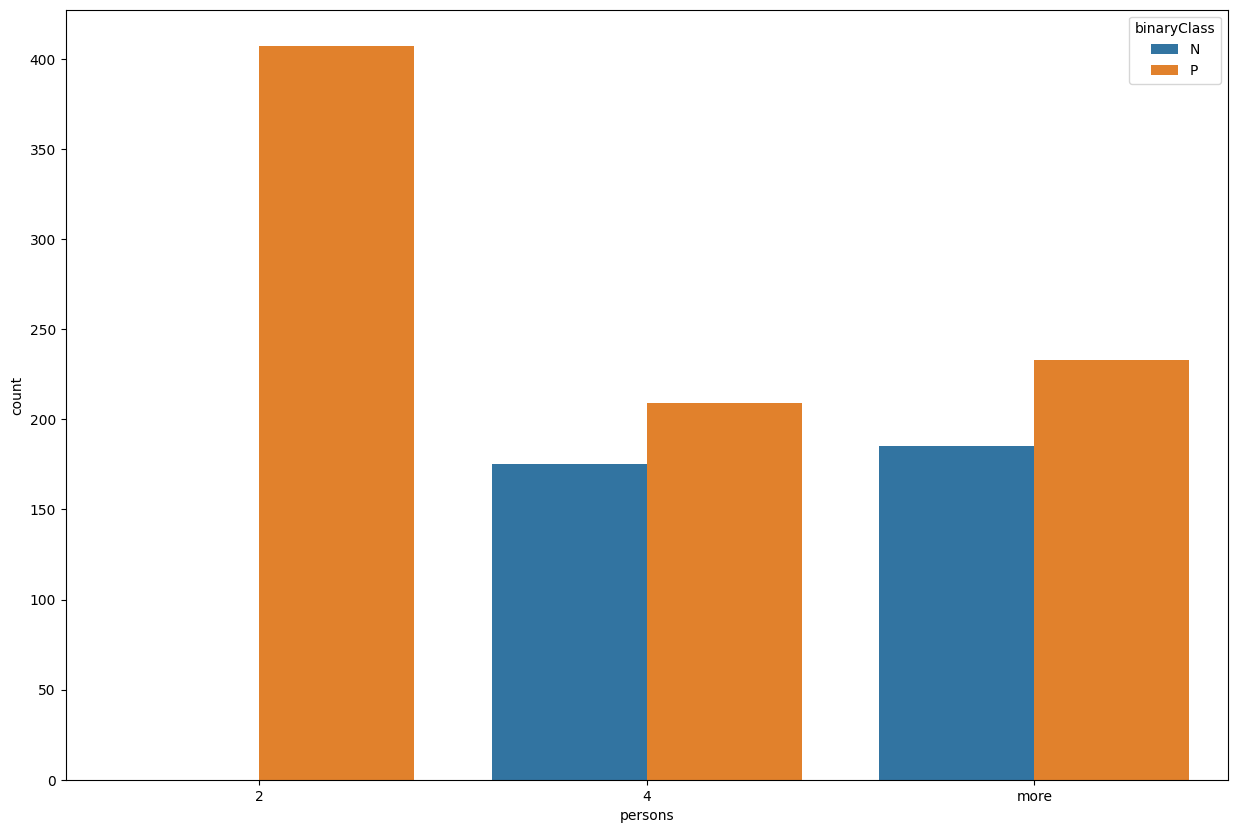

In [38]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='persons', hue='binaryClass')

In [39]:
train_data['lug_boot'].value_counts()

big      411
med      405
small    393
Name: lug_boot, dtype: int64

<Axes: xlabel='lug_boot', ylabel='count'>

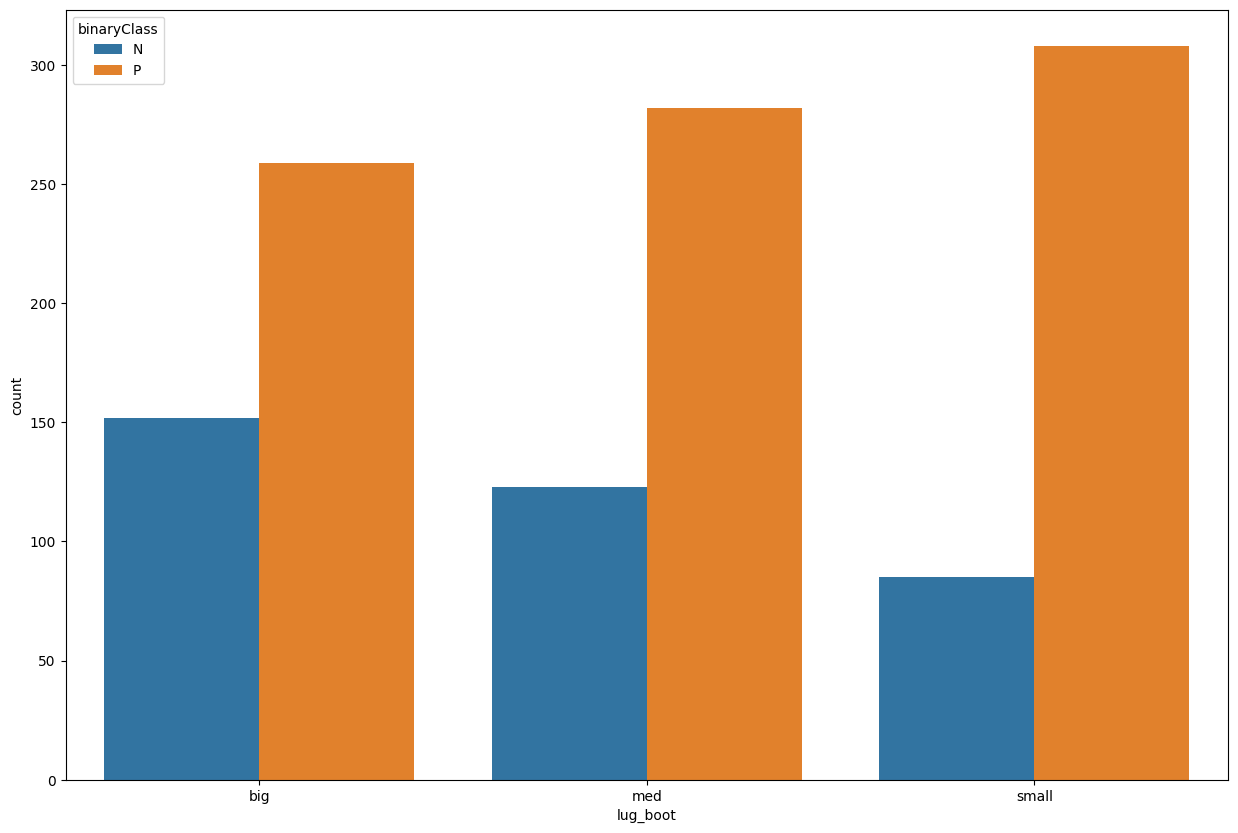

In [40]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='lug_boot', hue='binaryClass')

As you can see above,lug_boot as 50-50

In [41]:
train_data['safety'].value_counts()

med     406
low     402
high    401
Name: safety, dtype: int64

<Axes: xlabel='safety', ylabel='count'>

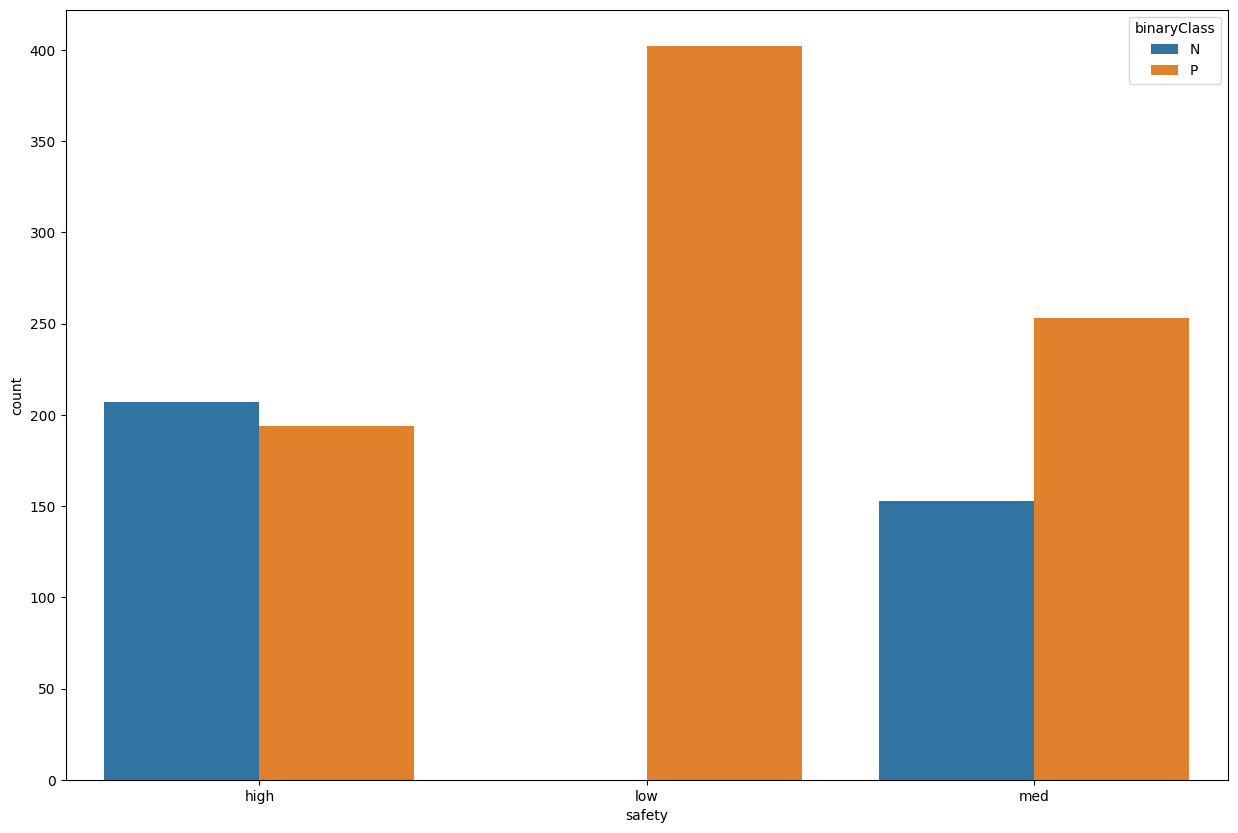

In [42]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='safety', hue='binaryClass')

As we seen above ,high safety people are not happy where medium safety accepts 30% and more people accept low safety

In [43]:
train_data['binaryClass'].value_counts()

P    849
N    360
Name: binaryClass, dtype: int64

<Axes: xlabel='binaryClass', ylabel='count'>

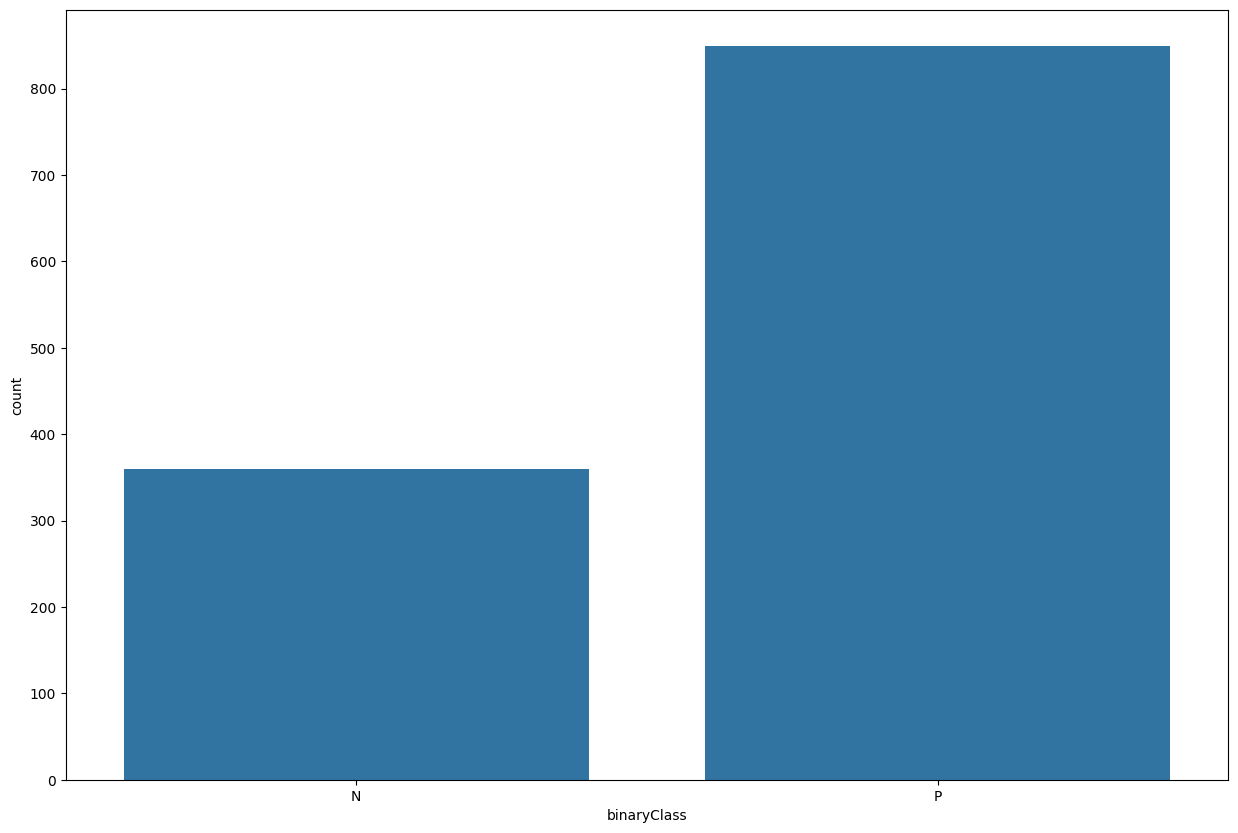

In [45]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='binaryClass')

**4-Data Preprocessing**

Handling Categorial Features

In [46]:
car_train=train_data.drop('binaryClass',axis=1)
car_labels=train_data[['binaryClass']]

Let's create a pipeline to encode all features in the training input data

In [48]:
from sklearn .preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
pipe=Pipeline([('ord_enc',OrdinalEncoder())])
car_train_prepared=pipe.fit_transform(car_train)

Let also handle labels. Label s contain P and N,<br>
so we want to convert these into numbers.Here we use LabelEncoder.<br>
Sklearn is esplicity that it is used to encode target features

In [50]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
car_labels_prepared=label_enc.fit_transform(car_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5-Training Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier()
tree_clf.fit(car_train_prepared,car_labels_prepared)

DecisionTreeClassifier()

**6-Evaluating Decision Trees**

In [54]:
from sklearn.metrics import accuracy_score
def accuracy(input_data,model,labels):
  preds=model.predict(input_data)
  acc=accuracy_score(labels,preds)
  return acc

In [55]:
from sklearn.metrics import confusion_matrix
def conf_matrix(input_data,model,labels):
  preds=model.predict(input_data)
  cm=confusion_matrix(labels,preds)
  return cm

In [56]:
from sklearn.metrics import classification_report
def class_report(input_data,model,labels):
  preds=model.predict(input_data)
  report=classification_report(labels,preds)
  report=print(report)
  return report

Let's find the accuracy on the training set

In [57]:
accuracy(car_train_prepared,tree_clf,car_labels_prepared)

1.0

In [58]:
conf_matrix(car_train_prepared,tree_clf,car_labels_prepared)

array([[360,   0],
       [  0, 849]])

In [59]:
class_report(car_train_prepared,tree_clf,car_labels_prepared)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       360
           1       1.00      1.00      1.00       849

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209

